# **Capstone project: Providing data-driven suggestions for HR**

## Description and deliverables

This capstone project is an opportunity for you to analyze a dataset and build predictive models that can provide insights to the Human Resources (HR) department of a large consulting firm.

Upon completion, you will have two artifacts that you would be able to present to future employers. One is a brief one-page summary of this project that you would present to external stakeholders as the data professional in Salifort Motors. The other is a complete code notebook provided here. Please consider your prior course work and select one way to achieve this given project question. Either use a regression model or machine learning model to predict whether or not an employee will leave the company. The exemplar following this actiivty shows both approaches, but you only need to do one.

In your deliverables, you will include the model evaluation (and interpretation if applicable), a data visualization(s) of your choice that is directly related to the question you ask, ethical considerations, and the resources you used to troubleshoot and find answers or solutions.


# **PACE stages**


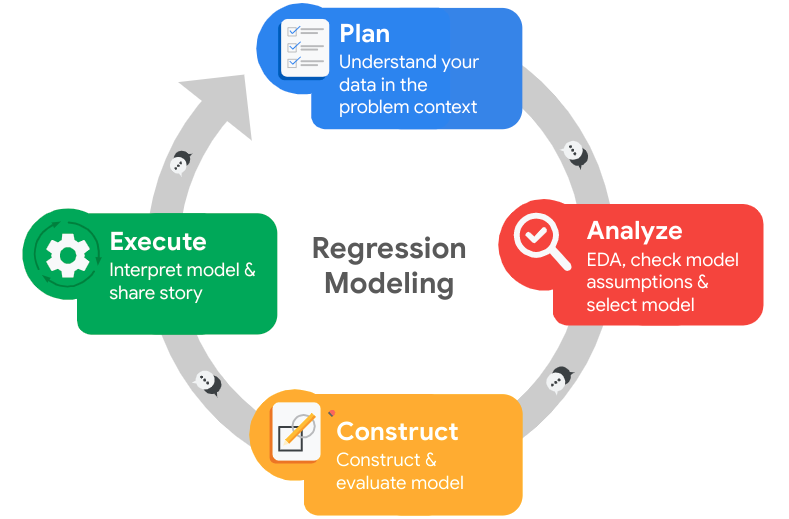

## **Pace: Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

In this stage, consider the following:

### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize yourself with the HR dataset

The dataset that you'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below. 

**Note:** you don't need to download any data to complete this lab. For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

💭
### Reflect on these questions as you complete the plan stage.

*  Who are your stakeholders for this project?
- What are you trying to solve or accomplish?
- What are your initial observations when you explore the data?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




* HR Department of the Sailfort Motors are my stakeholders for this project
* Trying to build a machine learning model that predicts whether an employee will quit or not 
* Naming convention of columns is not the best. There are no missing values in any of the rows, but there are 30,080 duplicated rows
* I have used https://www.educba.com/seaborn-subplots/ for subplot troubleshooting and stackoverflow for some errors
* Yes, dropping bias columns such as gender or personal information related to the user, which is not found in the data.

## Step 1. Imports

*   Import packages
*   Load dataset



### Import packages

In [1]:
# Import packages
### YOUR CODE HERE ### 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score,precision_score,f1_score,recall_score,confusion_matrix,ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier


### Load dataset

`Pandas` is used to read a dataset called **`HR_capstone_dataset.csv`.**  As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [2]:
# RUN THIS CELL TO IMPORT YOUR DATA. 

# Load dataset into a dataframe
### YOUR CODE HERE ###
df0 = pd.read_csv("HR_capstone_dataset.csv")


# Display first few rows of the dataframe
### YOUR CODE HERE ###
df0.head()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [3]:
# Gather basic information about the data
### YOUR CODE HERE ###
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Gather descriptive statistics about the data

In [4]:
# Gather descriptive statistics about the data
### YOUR CODE HERE ###
df0.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [5]:
# Display all column names
### YOUR CODE HERE ###
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [6]:
# Rename columns as needed
### YOUR CODE HERE ###

df0.columns=['satisfaction_level', 'last_performance', 'numberof_projects',
       'average_monthly_hours', 'yrs_in_company', 'accident_onwork', 'left',
       'promotion_last_5years', 'department', 'salary'] 
# Display all column names after the update
### YOUR CODE HERE ###
df0.columns

Index(['satisfaction_level', 'last_performance', 'numberof_projects',
       'average_monthly_hours', 'yrs_in_company', 'accident_onwork', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

### Check missing values

Check for any missing values in the data.

In [7]:
# Check for missing values
### YOUR CODE HERE ###
df0.isna().sum()

satisfaction_level       0
last_performance         0
numberof_projects        0
average_monthly_hours    0
yrs_in_company           0
accident_onwork          0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

### Check duplicates

Check for any duplicate entries in the data.

In [8]:
# Check for duplicates
### YOUR CODE HERE ###
df0[df0.duplicated()].size




30080

In [9]:
# Inspect some rows containing duplicates as needed
### YOUR CODE HERE ###
df0[(df0['satisfaction_level']==0.38) & ( df0['last_performance']==0.53) & (df0['numberof_projects']==2) & (df0['average_monthly_hours']==157) & (df0['yrs_in_company']==3) & (df0['accident_onwork']==0) & (df0['left']==1)]

,satisfaction_level,last_performance,numberof_projects,average_monthly_hours,yrs_in_company,accident_onwork,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
12000,0.38,0.53,2,157,3,0,1,0,sales,low
14211,0.38,0.53,2,157,3,0,1,0,sales,low


In [10]:
# Drop duplicates and save resulting dataframe in a new variable as needed
### YOUR CODE HERE ###

df=df0.drop_duplicates()
# Display first few rows of new dataframe as needed
### YOUR CODE HERE ###
df.head()

,satisfaction_level,last_performance,numberof_projects,average_monthly_hours,yrs_in_company,accident_onwork,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Check outliers

Check for outliers in the data.

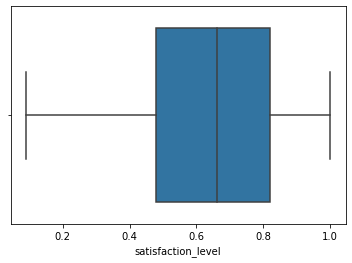

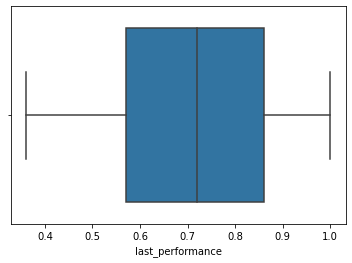

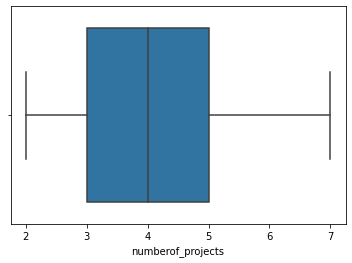

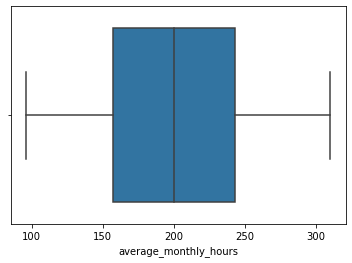

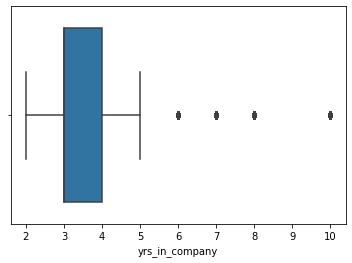

In [11]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
### YOUR CODE HERE ###
    
for i in range(5):
    sns.boxplot(x=df[df.columns[i]])
    plt.show()


    



In [12]:
# Determine the number of rows containing outliers
### YOUR CODE HERE ###

df[df['yrs_in_company']>5].shape

(824, 10)

Certain types of models are more sensitive to outliers than others. When you get to the stage of building your model, consider whether to remove outliers, based on the type of model you decide to use.

# pAce: Analyze Stage
- Perform EDA (analyze relationships between variables)



💭
### Reflect on these questions as you complete the analyze stage.

- What did you observe about the relationships between variables?
- What do you observe about the distributions in the data?
- What transformations did you make with your data? Why did you chose to make those decisions?
- What are some purposes of EDA before constructing a predictive model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




- Variables such as `average number of hours` and `number of projects` is linear, similar to `Years in company` with `number of projects`. These are the varaibles with highest correlation.  
- Continous variables such as `average monthly hours` and `number of projects` are normally distributed, whereas `last performance` seems to be uniformly distributed, `years in company` and `satisfaction level` are left & right skewed.  
- I changed categorical variables such as `department` and `salary` in order to use them in model training with the help of hot encoding.  
- Exploratory Data Analysis can help us understand the data and correlations between different variables in order to select apporpriate variables for model training and also extract insights about what is happening.  
- Seaborn Library was really helpful and old labs of course 3 came in handy. Links[https://www.coursera.org/learn/go-beyond-the-numbers-translate-data-into-insight/ungradedLab/AVJSd/exemplar-course-3-waze-project-lab/lab?path=%2Fnotebooks%2FExemplar_Course%25203%2520Waze%2520project%2520lab.ipynb, https://seaborn.pydata.org/]  
- I have to represent the data accurately, make sure no bias is causing the data to be skewed or mispresentation of the data for the sake of desired outcome.

## Step 2. Data Exploration (Continue EDA)

Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [13]:
# Get numbers of people who left vs. stayed
### YOUR CODE HERE ###
df.left.value_counts()
# Get percentages of people who left vs. stayed
### YOUR CODE HERE ###
df.left.value_counts(normalize=True)*100

0    83.39588
1    16.60412
Name: left, dtype: float64

### Data visualizations

Now, examine variables that you're interested in, and create plots to visualize relationships between variables in the data.

In [14]:
# Create a plot as needed
### YOUR CODE HERE ###
df.head(1)

,satisfaction_level,last_performance,numberof_projects,average_monthly_hours,yrs_in_company,accident_onwork,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low


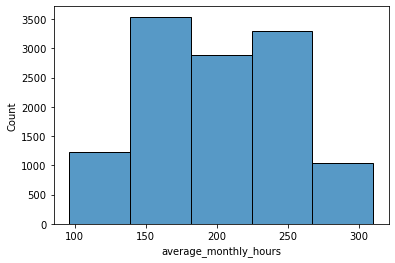

In [40]:
sns.histplot(x=df.average_monthly_hours,bins=5)

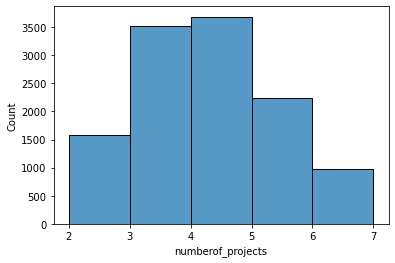

In [41]:
sns.histplot(x=df.numberof_projects,bins=5)

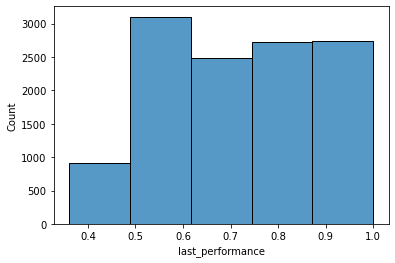

In [45]:
sns.histplot(x=df.last_performance,bins=5)

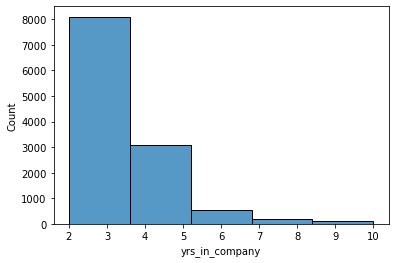

In [43]:
sns.histplot(x=df.yrs_in_company,bins=5)

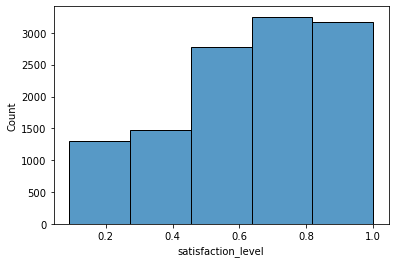

In [46]:
sns.histplot(x=df.satisfaction_level,bins=5)

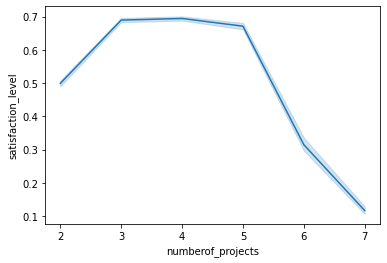

In [15]:
# Create a plot as needed
### YOUR CODE HERE ###
sns.lineplot(y=df.satisfaction_level,x=df.numberof_projects)

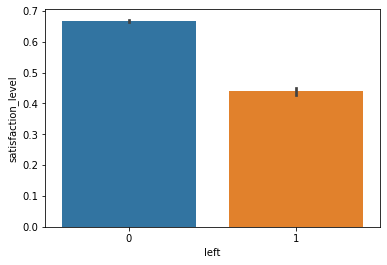

In [16]:
sns.barplot(x=df.left,y=df.satisfaction_level)

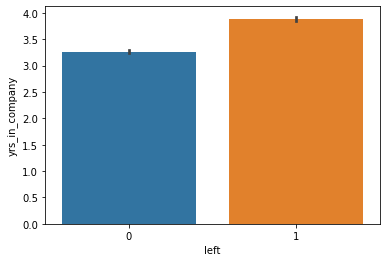

In [17]:
sns.barplot(x=df.left,y=df.yrs_in_company)

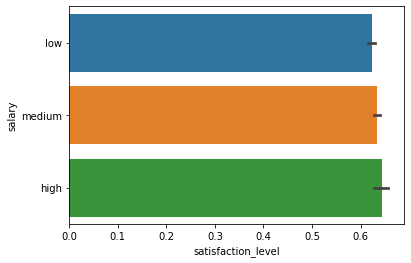

In [18]:
sns.barplot(x=df.satisfaction_level,y=df.salary)

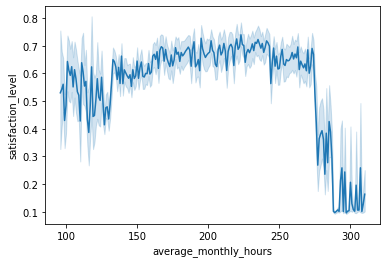

In [19]:
# Create a plot as needed
### YOUR CODE HERE ###
sns.lineplot(x=df.average_monthly_hours,y=df.satisfaction_level)

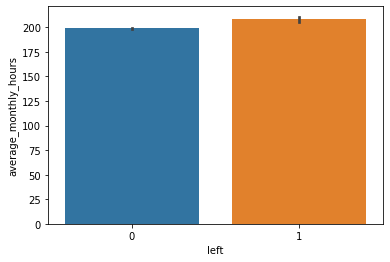

In [20]:
sns.barplot(y=df.average_monthly_hours,x=df.left)

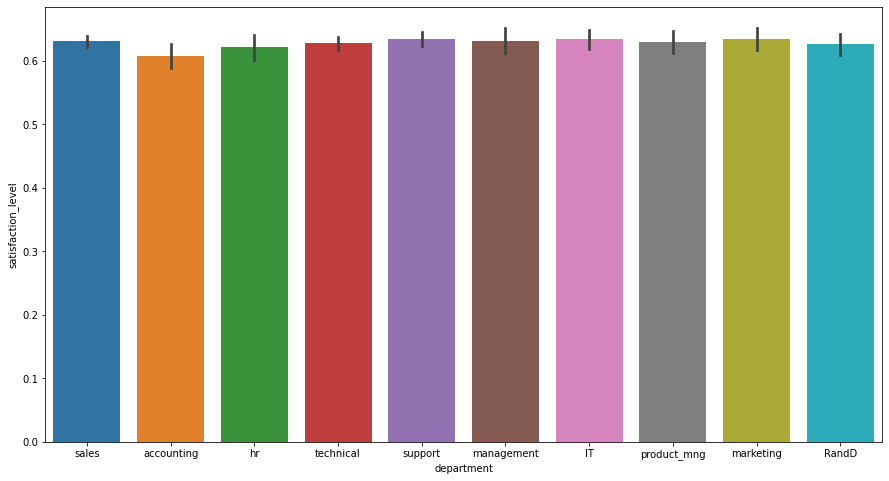

In [21]:
# Create a plot as needed
### YOUR CODE HERE ###
fig,ax=plt.subplots(figsize=(15,8))
sns.barplot(y=df.satisfaction_level,x=df.department)
plt.show()

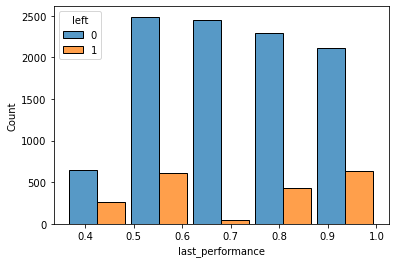

In [22]:
# Create a plot as needed
### YOUR CODE HERE ###
sns.histplot(x=df.last_performance,hue=df.left,multiple='dodge',shrink=0.9,bins=5)

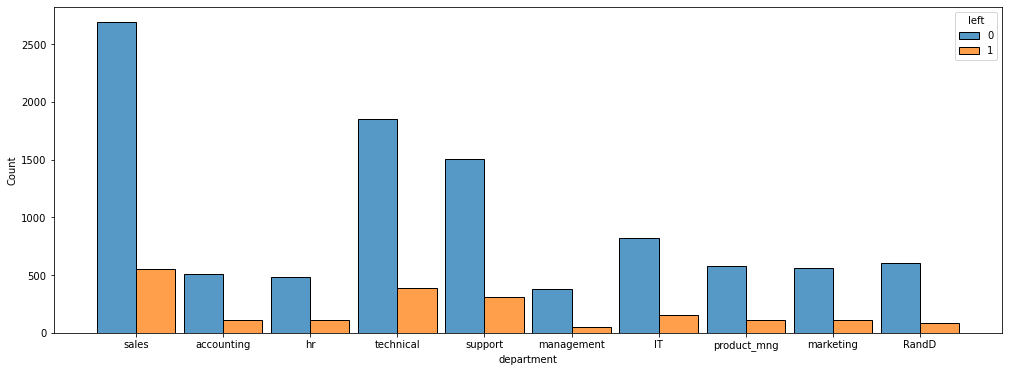

In [23]:
# Create a plot as needed
### YOUR CODE HERE ###
fig,ax=plt.subplots(figsize=(17,6))

sns.histplot(x=df.department,hue=df.left,multiple='dodge',shrink=0.9)

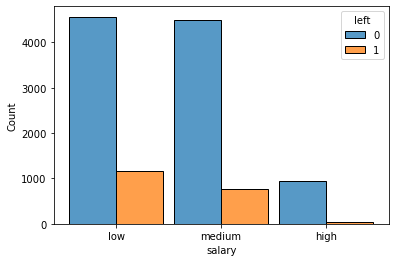

In [24]:
# Create a plot as needed
### YOUR CODE HERE ###
sns.histplot(x=df.salary,hue=df.left,multiple='dodge',shrink=0.9)

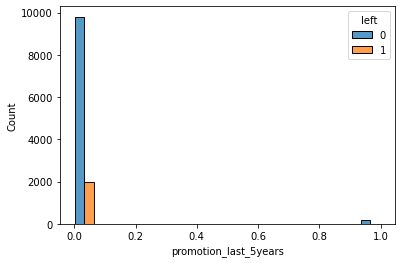

In [25]:
# Create a plot as needed
### YOUR CODE HERE ###
sns.histplot(x=df.promotion_last_5years,hue=df.left,multiple='dodge',shrink=0.9)

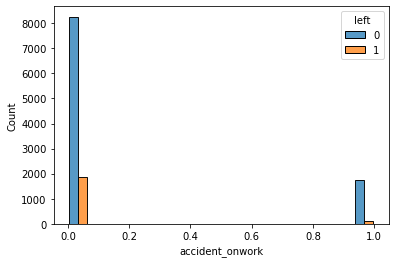

In [79]:
sns.histplot(x=df.accident_onwork,hue=df.left,multiple='dodge',shrink=0.9)

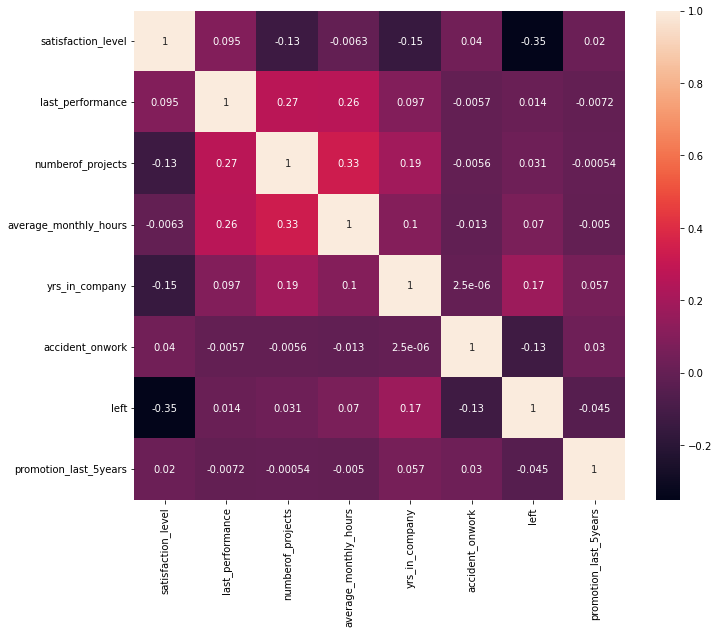

In [26]:
corr=df.corr()
f,ax=plt.subplots(figsize=(11,9))
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr,annot=True)

### Insights

We can extract various insights from the given data:
- Starting with the low satisfaction levels of the employees that left, average satisfaction level less than 0.5 is leading people to leave the company.  
- Another interesting insight is increase in `number of projects` i.e greater than 5 leads to exponential decrease in `satsifaction levels` which can result in employee leaving the company.  
- `satisfaction level` across all department is constant but, large number of employees who leave the company are from `sales` department followed by second largest department being `technical`.  
- `satisfaction level` across all salary is same,but `low` salary department has the most people leaving.  
- `Number of years in the company` had suprising insights, an employee with average time of more than 4 years leaves the company.
- `Last Performance` revealed that members who left either has an incredible performance level reaching 1 or just above average at 0.6 but never worse.
- Correlation matrix also provided some insights about the data:
    - `Accidents` has a -ve correlation with number of projects which is expected, but a -ve correlation with `left` was surprising to see
    - Positive correlation of `Accidents` with `Satisfaction level` was quite unexpected, maybe some employees think if they are part of accidents maybe they will get less projects hence less number of projects which may lead to less monthly hours which makes their satisfaction level go up 
    - `Number of years in the company` column has the highest correlation with `left` column, which verifies our earlier assumption about how employees that spent 4 years or more in the company leaves it.

# paCe: Construct Stage
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data


🔎
## Recall model assumptions

**Logistic Regression model assumptions**
- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size





💭
### Reflect on these questions as you complete the constructing stage.

- Do you notice anything odd?
- Which independent variables did you choose for the model and why?
- Are each of the assumptions met?
- How well does your model fit the data?
- Can you improve it? Is there anything you would change about the model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



- The `department` and `salary` variables seem to throw errors when involved in model training even after converting them into nominal variables, this might be due to some incorrect formatting, contact leadership team to know about the issue.  
- `satisfaction_level` `last_performance` `numberof_projects` `average_monthly_hours` `yrs_in_company` `accident_onwork`  `promotion_last_5years` were chosen as they had a correlation with our target variable.  
- Outcome `left` is categorical, observations are independent of each other since data of one employee does not affect the other unless there was an issue is data collection, there is no multicollinearity among X variables as correlation for highest correlation is simply 0.3 which is too low for assumption to be violated, only outliers in the data are present in number of years in the company which should be treated as legit values and are not global outliers so this assumption is ignored.  
- We have trained 3 models in order to retrieve the best result, to improve the model we can restructure our data based on `department` and `salary` variables to enhance the performance.  
- Documentation of Scikit-Learn, Course 6 Lab Exemplar.  
Links:  
- https://www.coursera.org/learn/the-nuts-and-bolts-of-machine-learning/ungradedLab/XPgRn/exemplar-course-6-waze-project-exemplar-lab/lab?path=%2Fnotebooks%2FExemplar_Course%25206%2520Waze%2520project%2520lab.ipynb  
- https://www.coursera.org/learn/the-nuts-and-bolts-of-machine-learning/ungradedLab/gXAhh/exemplar-build-a-random-forest-model/lab?path=%2Fnotebooks%2FExemplar_Build%2520a%2520random%2520forest%2520model.ipynb

## Step 3. Model Building, Step 4. Results and Evaluation
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

### Identify the type of prediction task.

As we are predicting if an employee will stay or leave the company,it is a binomial classification task.

### Identify the types of models most appropriate for this task.

We can use any of the classification models such as:
- Logistic Classifier
- Random Forest Classifier
- XGBoost Classifier
- Naive Bayes Classifier

### Modeling

Add as many cells as you need to conduct the modeling process.

In [27]:
# We will start with converting all categorical values into ordinal for modeling and store it in a another variable
### YOUR CODE HERE ###
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dff=df.copy()
dff['department']=le.fit_transform(dff['department'])



In [28]:
x=dff.drop(['left','salary','department'],axis=1)
y=dff.left 

xtra,xtest,ytra,ytest=train_test_split(x,y,random_state=42,test_size=0.2)

xtrain,xval,ytrain,yval=train_test_split(xtra,ytra,random_state=42,test_size=0.25)

x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11991 entries, 0 to 11999
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     11991 non-null  float64
 1   last_performance       11991 non-null  float64
 2   numberof_projects      11991 non-null  int64  
 3   average_monthly_hours  11991 non-null  int64  
 4   yrs_in_company         11991 non-null  int64  
 5   accident_onwork        11991 non-null  int64  
 6   promotion_last_5years  11991 non-null  int64  
dtypes: float64(2), int64(5)
memory usage: 1007.5 KB


In [29]:
def getval(name,model,yval,ypred):
    train_accuracy = accuracy_score(yval, ypred)
    train_f1 = f1_score(yval, ypred)
    train_precision = precision_score(yval, ypred)
    train_recall = recall_score(yval, ypred)
    table=pd.DataFrame({'model':[name],'accuracy':[train_accuracy],'f1':[train_f1],'precision':[train_precision],'recall':[train_recall]})
    return table


In [30]:
#Storing Training Metrics For Logistic Regression

logmodel=LogisticRegression().fit(xtrain,ytrain)

result=getval('LogisticReg Train',logmodel,ytrain,logmodel.predict(xtrain))
result

,model,accuracy,f1,precision,recall
0,LogisticReg Train,0.831943,0.292569,0.488281,0.208855


In [31]:
#Storing Training Metrics For Naive Bayes-Gaussian Model
gnc=GaussianNB().fit(xtrain,ytrain)
result=pd.concat([result,getval('Gaussian Train',gnc,ytrain,gnc.predict(xtrain))],axis=0)
result

,model,accuracy,f1,precision,recall
0,LogisticReg Train,0.831943,0.292569,0.488281,0.208855
0,Gaussian Train,0.833611,0.576882,0.500000,0.681704


In [32]:
rf=RandomForestClassifier(random_state=42)

scoring={'accuracy','precision','recall','f1'}

cv_params = {'n_estimators' : [50,100], 
              'max_depth' : [10,50],        
              'min_samples_leaf' : [0.5,1], 
              'min_samples_split' : [0.001, 0.01],
              'max_features' : ["sqrt"], 
              'max_samples' : [.5,.9]}

model=GridSearchCV(rf,cv_params,scoring=scoring,cv=5,refit='recall',verbose=3)
model.fit(xtrain,ytrain)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] max_depth=10, max_features=sqrt, max_samples=0.5, min_samples_leaf=0.5, min_samples_split=0.001, n_estimators=50 
[CV]  max_depth=10, max_features=sqrt, max_samples=0.5, min_samples_leaf=0.5, min_samples_split=0.001, n_estimators=50, accuracy=0.834, f1=0.000, precision=0.000, recall=0.000, total=   0.1s
[CV] max_depth=10, max_features=sqrt, max_samples=0.5, min_samples_leaf=0.5, min_samples_split=0.001, n_estimators=50 
[CV]  max_depth=10, max_features=sqrt, max_samples=0.5, min_samples_leaf=0.5, min_samples_split=0.001, n_estimators=50, accuracy=0.834, f1=0.000, precision=0.000, recall=0.000, total=   0.1s
[CV] max_depth=10, max_features=sqrt, max_samples=0.5, min_samples_leaf=0.5, min_samples_split=0.001, n_estimators=50 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s


[CV]  max_depth=10, max_features=sqrt, max_samples=0.5, min_samples_leaf=0.5, min_samples_split=0.001, n_estimators=50, accuracy=0.833, f1=0.000, precision=0.000, recall=0.000, total=   0.1s
[CV] max_depth=10, max_features=sqrt, max_samples=0.5, min_samples_leaf=0.5, min_samples_split=0.001, n_estimators=50 
[CV]  max_depth=10, max_features=sqrt, max_samples=0.5, min_samples_leaf=0.5, min_samples_split=0.001, n_estimators=50, accuracy=0.833, f1=0.000, precision=0.000, recall=0.000, total=   0.1s
[CV] max_depth=10, max_features=sqrt, max_samples=0.5, min_samples_leaf=0.5, min_samples_split=0.001, n_estimators=50 
[CV]  max_depth=10, max_features=sqrt, max_samples=0.5, min_samples_leaf=0.5, min_samples_split=0.001, n_estimators=50, accuracy=0.834, f1=0.000, precision=0.000, recall=0.000, total=   0.1s
[CV] max_depth=10, max_features=sqrt, max_samples=0.5, min_samples_leaf=0.5, min_samples_split=0.001, n_estimators=100 
[CV]  max_depth=10, max_features=sqrt, max_samples=0.5, min_samples_l

[Parallel(n_jobs=1)]: Done 160 out of 160 | elapsed:   32.7s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=42,
                                  

In [33]:
def getrr(name,model,metric):
    _dict = {'precision': 'mean_test_precision',
                   'recall': 'mean_test_recall',
                   'f1': 'mean_test_f1',
                   'accuracy': 'mean_test_accuracy',
                   }
    results=pd.DataFrame(model.cv_results_)
    best_=results.loc[results[_dict[metric]].idxmax(),:]
    
    f1 = best_.mean_test_f1
    recall = best_.mean_test_recall
    precision = best_.mean_test_precision
    accuracy = best_.mean_test_accuracy

   
    table = pd.DataFrame({'model': [name],
                          'precision': [precision],
                          'recall': [recall],
                          'f1': [f1],
                          'accuracy': [accuracy],
                          },
                         )
    return table
    

In [34]:
#Storing Training Metrics For Random Forest Model
result=pd.concat([result,getrr('RandomForest Train',model,'recall')],axis=0)
result

,model,accuracy,f1,precision,recall
0,LogisticReg Train,0.831943,0.292569,0.488281,0.208855
0,Gaussian Train,0.833611,0.576882,0.500000,0.681704
0,RandomForest Train,0.983876,0.949623,0.987331,0.914822


In [35]:
#Storing Validation Metrics For Logistic Regression Model, Gaussian Model, Random Forest Model

result=pd.concat([result,getval('LogisticReg Val',logmodel,yval,logmodel.predict(xval))],axis=0)


result=pd.concat([result,getval('Gaussian Val',gnc,yval,gnc.predict(xval))],axis=0)

result=pd.concat([result,getval('RandomForest Val',rf,yval,model.predict(xval))],axis=0)

result

,model,accuracy,f1,precision,recall
0,LogisticReg Train,0.831943,0.292569,0.488281,0.208855
0,Gaussian Train,0.833611,0.576882,0.500000,0.681704
0,RandomForest Train,0.983876,0.949623,0.987331,0.914822
0,LogisticReg Val,0.838198,0.319298,0.514124,0.231552
0,Gaussian Val,0.834862,0.579618,0.497268,0.694656
0,RandomForest Val,0.987907,0.961892,0.994565,0.931298


In [36]:
((0.961892-0.579618)/0.579618)*100

65.9527481893247

As you can see from the table above for  all the three models are performing well on both training as well as validation set
But RandomForest model is clearly the champion set here.   

Training Set:  
- Logistic Regression model with 0.292569 f1 score  
- Gaussian Classifier model with 0.576882 f1 score (Increased f1 performance by 97.1% of Logistic Regression Model)  
- RaForest Classifier model with 0.949623 f1 score (Increased f1 performance by 64.3% of Gaussian Classifier Model)  

Validation Set  
- Logistic Regression model with 0.319298 f1 score (Increased f1 performance by 8.3% of Training Logistic Regression Model)  
- Gaussian Classifier model with 0.579618 f1 score (Increased f1 performance by 81.5% of Logistic Regression Model)  
- RaForest Classifier model with 0.961892 f1 score (Increased f1 performance by 65.9 % of Logistic Regression Model)  
  
Therefore, choosing Random Forest Model is our best option to predict an employee leaving the company. 

In [37]:
#Testing our champion model on the test data
result=pd.concat([result,getval('RandomForest Test',rf,ytest,model.predict(xtest))],axis=0)
result

,model,accuracy,f1,precision,recall
0,LogisticReg Train,0.831943,0.292569,0.488281,0.208855
0,Gaussian Train,0.833611,0.576882,0.500000,0.681704
0,RandomForest Train,0.983876,0.949623,0.987331,0.914822
0,LogisticReg Val,0.838198,0.319298,0.514124,0.231552
0,Gaussian Val,0.834862,0.579618,0.497268,0.694656
0,RandomForest Val,0.987907,0.961892,0.994565,0.931298
0,RandomForest Test,0.979575,0.936115,0.980874,0.895262


Random Forest model is predicting values with a 0.89 recall on the test data which is very significant.

# pacE: Execute Stage
- Interpret model performance and results
- Share actionable steps with stakeholders



✏
## Recall evaluation metrics

- **AUC** is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example.
- **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy** measures the proportion of data points that are correctly classified.
- **F1-score** is an aggregation of precision and recall.






💭
### Reflect on these questions as you complete the executing stage.

- What key insights emerged from your model(s)?
- What business recommendations do you propose based on the models built?
- What potential recommendations would you make to your manager/company?
- Do you think your model could be improved? Why or why not? How?
- Given what you know about the data and the models you were using, what other questions could you address for the team?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



- Firstly, it was revealed that most important feature in predicting the possibility of an employee leaving was `Satisfaction Level`. Secondly, Random Forest model outperformed both Logistic and GaussianNB model by significant metrics on all three training, validation and testing set. Finally, the precision-recall score of Random Forest model was at 0.9~-0.9 which means chances of misclassification are very low.  
- As per the metrics, we can use this model to make predictions due to its high precision and recall or even for exploration. But, I do reccomend testing the model and see how it performs to unseen data as we know ensemble models are not the best at extrapolation and tend to overfit the data which doosn't seem to be the case as per our metrics on testing set as well as validation set.  
- Model wise, use new datasets to verify the consistency of the model and as per visualizations alone we can infer that increasing number of projects may cause decrease in satisfaction levels and could be the reason of departure of employees.  
- I think if we incorporate those `department` and `salary` columns which we dropped due to data formatting error could help the model improve, asking the correlation of `accidents` and `satisfaction level` could be explained by the team.  
- StackOverflow, Course 6 Lab Exemplar, ChatGPT  
- Links:  
    - https://www.coursera.org/learn/the-nuts-and-bolts-of-machine-learning/ungradedLab/XPgRn/exemplar-course-6-waze-project-exemplar-lab/lab?path=%2Fnotebooks%2FExemplar_Course%25206%2520Waze%2520project%2520lab.ipynb  
    - https://scikit-learn.org/1.5/modules/generated/sklearn.metrics.precision_recall_curve.html#sklearn.metrics.precision_recall_curve  
    - https://chatgpt.com/share/6715f525-6c38-8010-8844-6242f50d6097


## Step 4. Results and Evaluation
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders




In [61]:
result

,model,accuracy,f1,precision,recall
0,LogisticReg Train,0.831943,0.292569,0.488281,0.208855
0,Gaussian Train,0.833611,0.576882,0.500000,0.681704
0,RandomForest Train,0.983876,0.949623,0.987331,0.914822
0,LogisticReg Val,0.838198,0.319298,0.514124,0.231552
0,Gaussian Val,0.834862,0.579618,0.497268,0.694656
0,RandomForest Val,0.987907,0.961892,0.994565,0.931298
0,RandomForest Test,0.979575,0.936115,0.980874,0.895262


As you can see from the table above for  all the three models, each model is performing well on both training as well as validation set  
But, RandomForest model is clearly the champion model here.   

Training Set:  
- Logistic Regression model with 0.292569 f1 score  
- Gaussian Classifier model with 0.576882 f1 score (Increased f1 performance by 97.1% of Logistic Regression Model)  
- RaForest Classifier model with 0.949623 f1 score (Increased f1 performance by 64.3% of Gaussian Classifier Model)  

Validation Set:  
- Logistic Regression model with 0.319298 f1 score (Increased f1 performance by 8.3% of Training Logistic Regression Model)  
- Gaussian Classifier model with 0.579618 f1 score (Increased f1 performance by 81.5% of Logistic Regression Model)  
- RaForest Classifier model with 0.961892 f1 score (Increased f1 performance by 65.9 % of Gaussian Classifier Model)  
  
Therefore, choosing Random Forest Model is our best option to predict an employee leaving the company. 

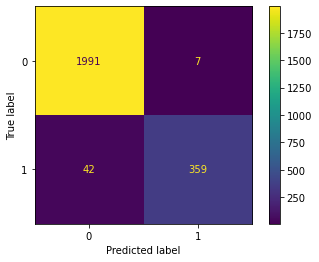

In [38]:
np.set_printoptions(suppress=True)
cm=confusion_matrix(ytest,model.predict(xtest))
dp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
dp.plot(values_format='.0f') 

- As you can see from the above confusion matrix, the model has very few `false positives` and `false negatives` which means
the model is less prone to predict an employee as `Will leave` when they are not going to, or predict an employee as `Will not leave` but in actuality the employee may.

- `Recall` value explains this very behaviour of the model, if the model predicts someone to leave than HR may reduce their loadwork or reduce their participation in number of projects in order to retain them. Therefore the risk for falsely predicting is not significantly high, unless the company will dedicate a large amount of resources in order to ease their dissatisfaction

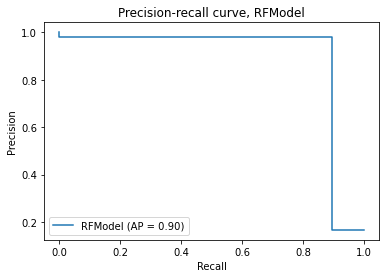

In [78]:
# Plot precision-recall curve
from sklearn.metrics import PrecisionRecallDisplay,precision_recall_curve,average_precision_score
avgscore=average_precision_score(ytest, model.predict(xtest))
precision, recall, _ = precision_recall_curve(ytest, model.predict(xtest))
display = PrecisionRecallDisplay(average_precision=avgscore,precision=precision,recall=recall,estimator_name='RFModel')
display.plot()
plt.title('Precision-recall curve, RFModel');

- From the above plot we can confirm our precision-recall at 0.9~ - 0.9~ which means that model will predict 90% of the time a user is going to leave with precision of 90% as well which is impressive.

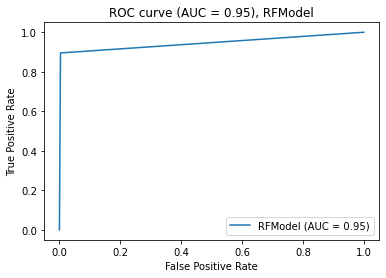

In [59]:
from sklearn.metrics import RocCurveDisplay,roc_curve,auc

fpr, tpr, _ = roc_curve(ytest, model.predict(xtest))

# Compute AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)

# Create and plot the ROC curve
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='RFModel')
display.plot()

# Customize the plot
plt.title(f'ROC curve (AUC = {roc_auc:.2f}), RFModel')
plt.show()

- Above plot represents the chance of model predicting a random positive higher than a random negative model which is 95%.

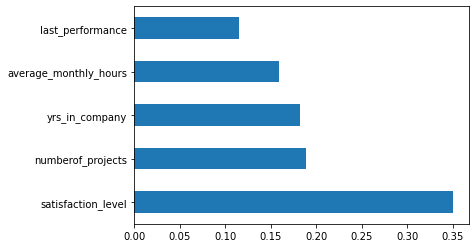

In [77]:
feat_importances = pd.Series(model.best_estimator_.feature_importances_, index=x.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

Above plot represents the top 5 important features which influenced Y Dependent variable  
- `Satisfaction Level` at 0.35 as the most important.
- `Number Of Projects` at 0.20 as the second most important.

### Summary of model results
We have trained 3 models:  
- Logistic Regression Model
- GaussianNB Classifier Model
- Random Forest Classifier Model  

`Random Forest Classifier Model` managed to outperformed all the other models by a huge margin, outputting high accuracy, precision, f1 score by ~240% of `Logistic Regression Model`. 

Metrics for Random Forest Regression Model:  
- Accuracy:0.97 
- Precision:0.98  
- F1:0.93  
- Recall:0.89  
- ROC-AUC:0.95  

Important Features:
- `Satisfaction Level`: 0.35
- `Number of projects`:  0.19
- `Years in company`:0.18  
- `Average monthly hours`:0.16  



### Conclusion, Recommendations, Next Steps

- Model performed signficantly well on all 3 data sets
- Verify model metrics on unseen data set
- Use the model for exploration, as well as business decisions after verification  
- Re-explore the data to derive more insights from known correlations in the model
- Contact the team to know about unicode errors in `department` and `salary` columns

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.